# testing deep net with mnist dataset

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from Modules import mnistHelper as mHelper
from Modules import dropout
from Modules import deepnn as deepnn
from Modules import adamGradientDescent as adam
from Modules import testCases_v4a
(trainXOriginal, trainyOriginal), (testXOriginal, testyOriginal) = mnist.load_data()

In [9]:
import numpy as np

In [5]:
%matplotlib inline

In [6]:
trainXOriginal.shape

(60000, 28, 28)

(28, 28)


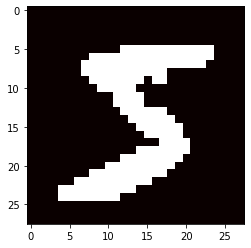

In [7]:
#show random number
demo = trainXOriginal[0]
print(trainXOriginal[0].shape)
plt.imshow(demo, cmap="hot", vmin=0, vmax=1) #reshape back to 20 pixel by 20 pixel
plt.show()

### one hot encode y array to turn output layer into 10-node

In [10]:
#one-hot encode
ytmp= np.reshape(trainyOriginal, (-1, 1))
encoder = OneHotEncoder(sparse=False)
yTrain = encoder.fit_transform(ytmp)
ytmp= np.reshape(testyOriginal, (-1, 1))
encoder = OneHotEncoder(sparse=False)
yTest = encoder.fit_transform(ytmp)

C:\Users\jackc\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\jackc\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

## reshape input from 28x28 to 1-d i.e. 784

In [11]:
X_train_flatten = trainXOriginal.reshape(trainXOriginal.shape[0], -1)
X_test_flatten = testXOriginal.reshape(testXOriginal.shape[0], -1)
X_train_flatten.shape

(60000, 784)

In [12]:
#normalize features
XTrain = X_train_flatten.astype('float32')
XTest = X_test_flatten.astype('float32')
#XTrain = X_train_flatten
#XTest = X_test_flatten
XTrain /= 255
XTest /= 255

In [13]:
#transpose - to make it work with functions
XTest,XTrain,yTest,yTrain = XTest.T,XTrain.T,yTest.T,yTrain.T
XTest.shape

(784, 10000)

## Test with batch gradient Descent

Cost after iteration 0: 7.300916
Cost after iteration 10: 2.080420
Cost after iteration 20: 1.431064
Cost after iteration 30: 1.039200
Cost after iteration 40: 0.923020
Cost after iteration 50: 0.850451
Cost after iteration 60: 0.764680
Cost after iteration 70: 0.717574
Cost after iteration 80: 0.681970
Cost after iteration 90: 0.652706


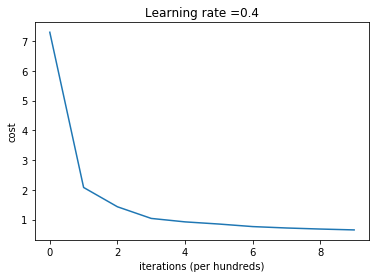

In [24]:
parameters = deepnn.L_layer_model(XTrain, yTrain,layers_dims = [XTrain.shape[0], 64, 10], num_iterations = 100, learning_rate = 0.4, lambd = 0.3)

In [23]:
print ("On the training set:")
predictions_train = mHelper.predictMinst(XTrain, trainyOriginal, parameters)
print ("On the test set:")
predictions_test = mHelper.predictMinst(XTest, testyOriginal, parameters)

On the training set:
(10, 60000)
Accuracy: 0.8579
On the test set:
(10, 10000)
Accuracy: 0.865


## Test with mini-batch gradient descent

Cost after iteration 0: 1.280253
Cost after iteration 2: 0.520910
Cost after iteration 4: 0.454870
Cost after iteration 6: 0.418886
Cost after iteration 8: 0.400128
Cost after iteration 10: 0.383571
Cost after iteration 12: 0.373486
Cost after iteration 14: 0.364946
Cost after iteration 16: 0.357260
Cost after iteration 18: 0.351835


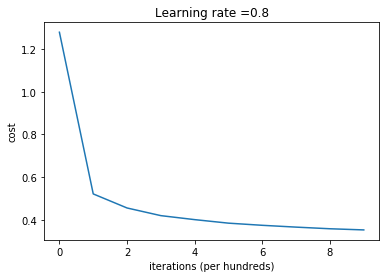

In [25]:
parameters = deepnn.L_layer_model_mini(XTrain, yTrain,layers_dims = [XTrain.shape[0], 50, 10], num_iterations = 20, learning_rate = 0.8, lambd = 0, mini_batch_size=64, optimizer="gd", printIteration=2, updateIteration=2)

In [26]:
print ("On the training set:")
predictions_train = mHelper.predictMinst(XTrain, trainyOriginal, parameters)
print ("On the test set:")
predictions_test = mHelper.predictMinst(XTest, testyOriginal, parameters)

On the training set:
(10, 60000)
Accuracy: 0.9504833333333333
On the test set:
(10, 10000)
Accuracy: 0.9414


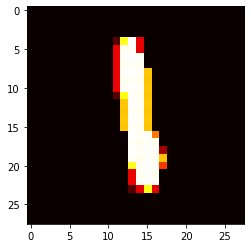

[1]


In [27]:
#test single case
test = mHelper.displayPrediction(np.atleast_2d(XTrain[:,200]).T,parameters)

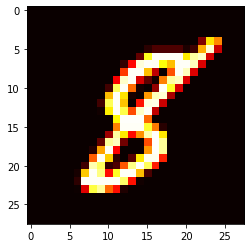

[8]


In [28]:
test = mHelper.displayPrediction(np.atleast_2d(XTrain[:,202]).T,parameters)

## test using mini-batch with adam GD optimizer 

Cost after iteration 0: 0.685319
Cost after iteration 2: 0.381601
Cost after iteration 4: 0.352362
Cost after iteration 6: 0.333412
Cost after iteration 8: 0.316251
Cost after iteration 10: 0.309458
Cost after iteration 12: 0.302118
Cost after iteration 14: 0.294718
Cost after iteration 16: 0.291657
Cost after iteration 18: 0.287568


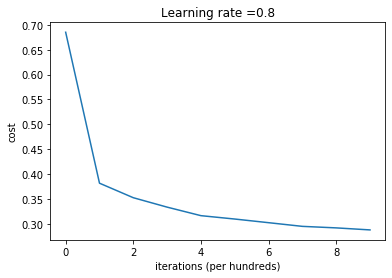

In [29]:
parameters = deepnn.L_layer_model_mini(XTrain, yTrain,layers_dims = [XTrain.shape[0], 50, 10], num_iterations = 20, learning_rate = 0.8, lambd = 0, mini_batch_size=64, optimizer="adam",printIteration=2 ,updateIteration=2)

In [30]:
print ("On the training set:")
predictions_train = mHelper.predictMinst(XTrain, trainyOriginal, parameters)
print ("On the test set:")
predictions_test = mHelper.predictMinst(XTest, testyOriginal, parameters)

On the training set:
(10, 60000)
Accuracy: 0.9591666666666666
On the test set:
(10, 10000)
Accuracy: 0.9462


## Test batch gradient descent with dropout regularization

In [2]:
from Modules import dropout

Cost after iteration 0: 7.566865
Cost after iteration 10: 3.020616
Cost after iteration 20: 2.343820
Cost after iteration 30: 2.078669
Cost after iteration 40: 1.902334
Cost after iteration 50: 1.788864
Cost after iteration 60: 1.680454


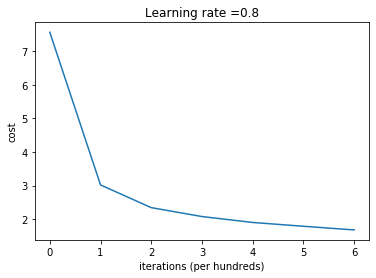

In [14]:
parameters = deepnn.L_layer_model_dropout(XTrain, yTrain,layers_dims = [XTrain.shape[0], 64, 10], num_iterations = 70, learning_rate = 0.8)

On the training set:
(10, 60000)
Accuracy: 0.86645
On the test set:
(10, 10000)
Accuracy: 0.8707


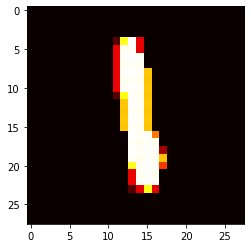

[1]


In [15]:
print ("On the training set:")
predictions_train = mHelper.predictMinst(XTrain, trainyOriginal, parameters)
print ("On the test set:")
predictions_test = mHelper.predictMinst(XTest, testyOriginal, parameters)
pred3 = mHelper.displayPrediction(np.atleast_2d(XTrain[:,200]).T,parameters)